# Train model

In [1]:
batch_size=32
pickle_file='test_dataset_cluster_labeled.pickle'
limit_seq_len=100

In [2]:
from dataset import DwgDataset
dwg_dataset = DwgDataset(pickle_file=pickle_file, batch_size=batch_size, limit_seq_len=limit_seq_len)

In [3]:
lr=1e-5
epochs=1100
train_verbose=False

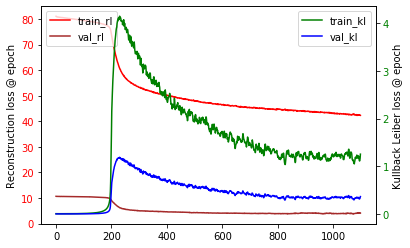

Epoch [1099 @ 2427.8sec] train losses: rl:42.2776 kl:1.2836 validation losses rl:4.1395 kl:0.3583
Test losses rl:0.1755 kl:1.9577


In [4]:
from sketch_rnn import Trainer
from IPython.display import clear_output
from plot_graphics import plot_history
import time

trainer = Trainer(
    dwg_dataset, 
    lr=lr, 
    train_verbose=train_verbose)

train_kl_losses = []
train_rl_losses = []
val_kl_losses  = []
val_rl_losses  = []
start = time.time()

for epoch_no in range(epochs):
    train_rl, train_kl, val_rl, val_kl = trainer.train_epoch(epoch_no)
    clear_output(wait=True)
    
    plot_history(train_rl_losses, train_kl_losses, val_rl_losses, val_kl_losses)
    print('Epoch [{} @ {:4.1f}sec] train losses: rl:{:1.4f} kl:{:1.4f} validation losses rl:{:1.4f} kl:{:1.4f}'.format(
        epoch_no, 
        time.time() - start,
        train_rl,
        train_kl,
        val_rl, 
        val_kl))
    
    train_kl_losses.append(train_kl)
    train_rl_losses.append(train_rl)
    val_kl_losses.append(val_kl)
    val_rl_losses.append(val_rl)

# Calculate test accuracy
test_kl, test_rl = trainer.CalculateLoaderAccuracy(trainer.test_loader)
print('Test losses rl:{:1.4f} kl:{:1.4f}'.format(test_rl, test_kl))    